[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/blhuillier/Olympiades/blob/main/Data/read_DESI_DR2.ipynb
)

In [16]:
import numpy as np
import pandas as pd
from astropy import constants as c, units as u 
from astropy.cosmology import LambdaCDM
import matplotlib.pyplot as plt

In [17]:
# Sound Horizon at drag epoch -- the physical size of the BAO
rd = 147.1 * u.Mpc 

In [18]:
# i define a list of colors:  
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/blhuillier/Olympiades/refs/heads/main/Data/DESI_DR2.csv")

In [20]:
df

,Tracer,z_eff,DV/rd,err_DV/rd,DM/DH,err_DM/DH,"rV,M/H",DM/rd,err_DM/rd,DH/rd,err_DH/rd,"rM,H"
0,BGS,0.295,7.942,0.075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LRG1,0.510,12.720,0.099,0.622,0.017,0.050,13.588,0.167,21.863,0.425,-0.459
2,LRG2,0.706,16.050,0.110,0.892,0.021,-0.018,17.351,0.177,19.455,0.330,-0.404
3,LRG3+ELG1,0.934,19.721,0.091,1.223,0.019,0.056,21.576,0.152,17.641,0.193,-0.416
4,ELG2,1.321,24.252,0.174,1.948,0.045,0.202,27.601,0.318,14.176,0.221,-0.434
5,QSO,1.484,26.055,0.398,2.386,0.136,0.044,30.512,0.760,12.817,0.516,-0.500
6,Lya,2.330,31.267,0.256,4.518,0.097,0.574,38.988,0.531,8.632,0.101,-0.431
7,LRG3,0.922,19.656,0.105,1.232,0.021,0.106,21.648,0.178,17.577,0.213,-0.406
8,ELG1,0.955,20.008,0.183,1.220,0.033,0.420,21.707,0.335,17.803,0.297,-0.462


DM is the comoving distance $$d_M(z)$$  
DH is the ``Hubble distance'' $$d_H = \frac c {H(z)}$$
DV is the spherically-averaged distance: $$D_V(z) = (zD_M(z)^2/H(z))^{1/3}$$

Text(0.5, 1.0, 'Distances vs Redshift')

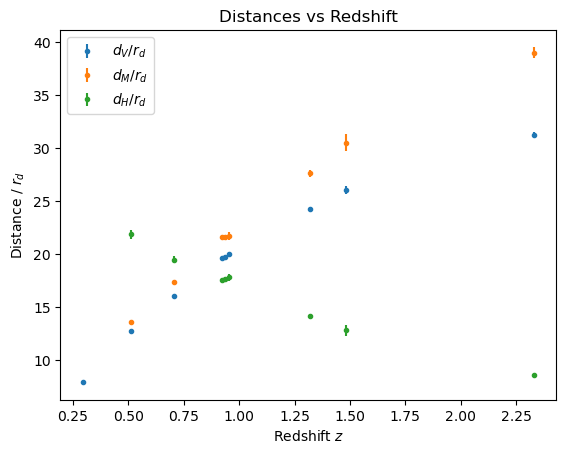

In [21]:
# Plot the data with errorbars and theory

fig, ax = plt.subplots() # figsize=(8, 6)
ax.errorbar(df['z_eff'], df['DV/rd'], yerr=df['err_DV/rd'], fmt='.',  label=r'$d_V/r_d$')
ax.errorbar(df['z_eff'], df['DM/rd'], yerr=df['err_DM/rd'], fmt='.',  label=r'$d_M/r_d$')
ax.errorbar(df['z_eff'], df['DH/rd'], yerr=df['err_DH/rd'], fmt='.', label=r'$d_H/r_d$')
# ax.plot(df['z'], df['dM/rd'], label=r'$d_M/r_d$', color='red')
ax.legend()
ax.set_xlabel('Redshift $z$')
ax.set_ylabel('Distance / $r_d$')
ax.set_title('Distances vs Redshift')


In [22]:
# Plot the theory: 

# define the cosmology: 

H0 = 70 * u.km / u.s / u.Mpc
# Hubble constant
Om0 = 0.3 # Matter density
Ode0 = 0.7  # Dark energy density
Ok0 = 1.-Om0-Ode0   # Curvature density
universe = LambdaCDM(H0=H0, Om0=Om0, Ode0=Ode0)  #

# define the redshift range
zz = np.linspace(0,5,501)

# compute the distances
# dM = comoving distance
dM = universe.comoving_distance(zz) / rd # comoving distance

# dV = volume distance

# Hubble distance dH = c/H(z)

 

Text(0.5, 1.0, 'Distances vs Redshift')

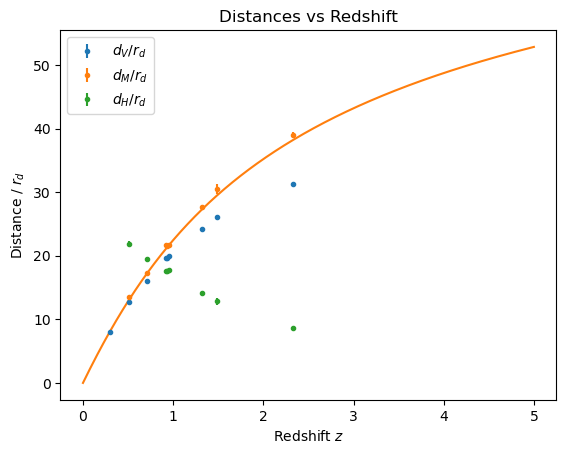

In [23]:
# Plot the data with errorbars and theory

fig, ax = plt.subplots() # figsize=(8, 6)
ax.errorbar(df['z_eff'], df['DV/rd'], yerr=df['err_DV/rd'], fmt='.',  label=r'$d_V/r_d$',c=colors[0])
ax.errorbar(df['z_eff'], df['DM/rd'], yerr=df['err_DM/rd'], fmt='.',  label=r'$d_M/r_d$',c=colors[1])
ax.errorbar(df['z_eff'], df['DH/rd'], yerr=df['err_DH/rd'], fmt='.', label=r'$d_H/r_d$',c=colors[2])

ax.plot(zz, dM,c=colors[1] )

ax.legend()
ax.set_xlabel('Redshift $z$')
ax.set_ylabel('Distance / $r_d$')
ax.set_title('Distances vs Redshift')


# It's hard to see anything; let's plot (data - theory) / theory

Text(0.5, 1.0, 'Distances vs Redshift')

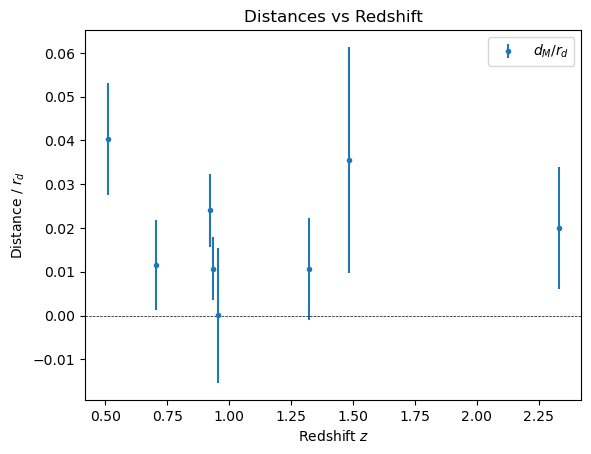

In [24]:
# Plot the data with errorbars and theory

fig, ax = plt.subplots() # figsize=(8, 6)

# dV = 
# dH = 
dM = (universe.comoving_transverse_distance(df['z_eff']) / rd).value # comoving distance
# ax.errorbar(df['z_eff'], df['DV/rd'] / , yerr=df['err_DV/rd'], fmt='.',  label=r'$d_V/r_d$')
ax.errorbar(df['z_eff'], df['DM/rd']/ dM - 1 , yerr=df['err_DM/rd']/ dM, fmt='.',  label=r'$d_M/r_d$')
# ax.errorbar(df['z_eff'], df['DH/rd'], yerr=df['err_DH/rd'], fmt='.', label=r'$d_H/r_d$')

ax.axhline(y=0, color='black', lw=0.5, ls='--')
ax.legend()
ax.set_xlabel('Redshift $z$')
ax.set_ylabel('Distance / $r_d$')
ax.set_title('Distances vs Redshift')


# Calculer la ``qualité du fit'' 